# 最简单例子

In [1]:
import numpy as np
from sklearn import metrics
y = np.array([1, 1, 2, 2])
pred = np.array([0.1, 0.4, 0.35, 0.8])
#0.8 0.4 0.35 0.1
# 2  1     2  1
fpr, tpr, thresholds = metrics.roc_curve(y, pred, pos_label=2)
print(fpr,tpr,thresholds)
metrics.auc(fpr, tpr)

[0.  0.  0.5 0.5 1. ] [0.  0.5 0.5 1.  1. ] [1.8  0.8  0.4  0.35 0.1 ]


0.75

[Receiver Operating Characteristic (ROC) with cross validation — scikit-learn 0.24.2 documentation](https://scikit-learn.org/0.24/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py)

In [7]:
print(__doc__)

import numpy as np
from numpy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

###############################################################################
# Data IO and generation

# import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target


Automatically created module for IPython interactive environment


In [8]:
print(y) # 有三个类别
print(y.shape)  # 150

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150,)


In [9]:
# 总共有三个类别
X, y = X[y != 2], y[y != 2]
n_samples, n_features = X.shape
print(X.shape) # 100x804 28*28

(100, 4)


[ 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32
 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 58 59 60 61 62 63 64
 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88
 89 90 91 92 93 94 95 96 97 98 99] [ 0  1  2  3  4  5  6  7  8 50 51 52 53 54 55 56 57] (83,) (17,)
y[test].shape (17,),probas_.shape (17, 2),probas_[:2,0] [0.51556645 0.63968427]
probas_[1,:] [0.63968427 0.36031573]
auc 0.6805555555555556
auc 0.6944444444444444
auc 0.8333333333333334
auc 0.5972222222222222
auc 0.765625
auc 0.40625


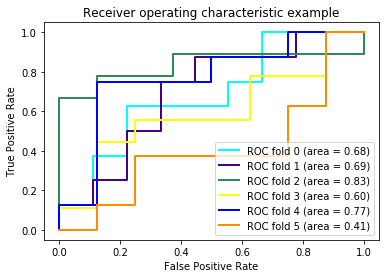

In [30]:

# Add noisy features
random_state = np.random.RandomState(0)
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

###############################################################################
# Classification and ROC analysis

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=6)

# 注意这里的应该改为probability=True以概率形式输出
classifier = svm.SVC(kernel='linear', probability=True, random_state=random_state)

# 平均tpr，
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange'])
lw = 2

i = 0
# k折交叉验证
for (train, test), color in zip(cv.split(X, y), colors):
    if i==0: print(train,test,train.shape,test.shape)
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    #　注意这里返回的阈值，以区分正负样本的阈值
    if i==0:
        print(f'y[test].shape {y[test].shape},probas_.shape {probas_.shape},probas_[:2,0] {probas_[:2,0]}')
        print(f'probas_[1,:] {probas_[1,:]}')
    # 17*2，每行有两个概率，这里假设2分类，所以第一个值为不是的概率，第二个值是是的概率，所以用[:,1]
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    # 进行插值，根据fpr和tpr的关系插值得到mean_tpr
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0 #必须从0开始
    roc_auc = auc(fpr, tpr)
    print(f'auc {roc_auc}')
    plt.plot(fpr, tpr, lw=lw, color=color, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()



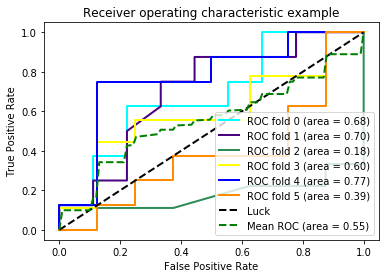

In [31]:
# 画在一个图中

# 平均tpr，
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
i = 0
# k折交叉验证
for (train, test), color in zip(cv.split(X, y), colors):
    probas_ = classifier.fit(X[train], y[train]).predict_proba(X[test])
    # Compute ROC curve and area the curve
    #　注意这里返回的阈值，以区分正负样本的阈值
    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
    # 进行插值，根据fpr和tpr的关系插值得到mean_tpr
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0 #比如从0开始
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=lw, color=color, label='ROC fold %d (area = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=lw, color='k',label='Luck')

mean_tpr /= cv.get_n_splits(X, y) #计算了几次和，计算平均值
mean_tpr[-1] = 1.0 # 最后一个必须为1
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='g', linestyle='--', label='Mean ROC (area = %0.2f)' % mean_auc, lw=lw)

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()
# ————————————————
# 版权声明：本文为CSDN博主「yqtaowhu」的原创文章，遵循CC 4.0 BY-SA版权协议，转载请附上原文出处链接及本声明。
# 原文链接：https://blog.csdn.net/taoyanqi8932/article/details/54409314

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py